In [9]:
import pandas as pd
import os

data201810 = pd.read_excel("201810_totData.xlsx")
data201811 = pd.read_excel("201811_totData.xlsx")
data201812 = pd.read_excel("201812_totData.xlsx")
data201901 = pd.read_excel("201901_totData.xlsx")
data201902 = pd.read_excel("201902_totData.xlsx")

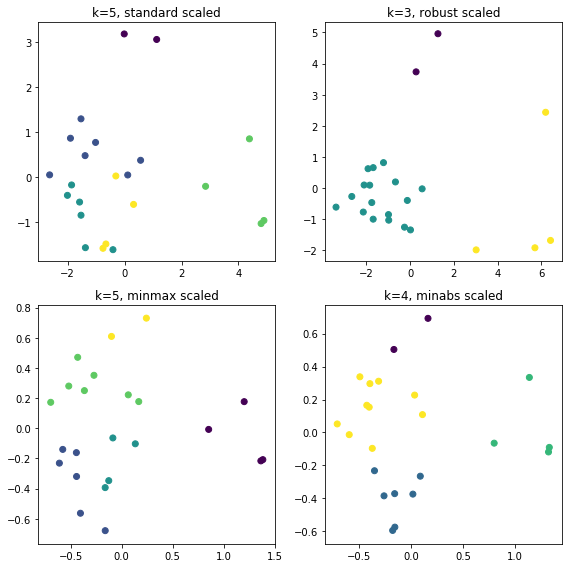

,std군집,rbt군집,mm군집,ma군집
0,0,0,4,0
1,2,1,1,3
2,4,1,2,1
3,2,1,1,1
4,4,1,2,1
5,2,1,1,3
6,0,0,4,0
7,4,1,2,1
8,3,2,0,2
9,2,1,1,3


In [10]:
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

#Scaling
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()

data_std_scaled = standard_scaler.fit_transform(data201810.loc[:,"풍량":"버스이용자수"])
data_rbt_scaled = robust_scaler.fit_transform(data201810.loc[:,"풍량":"버스이용자수"])
data_mm_scaled = minmax_scaler.fit_transform(data201810.loc[:,"풍량":"버스이용자수"])
data_ma_scaled = maxabs_scaler.fit_transform(data201810.loc[:,"풍량":"버스이용자수"])

# K-means
std_km5 = cluster.KMeans(n_clusters=5, random_state=42).fit(data_std_scaled)
rbt_km5 = cluster.KMeans(n_clusters=3, random_state=42).fit(data_rbt_scaled)
mm_km5 = cluster.KMeans(n_clusters=5, random_state=42).fit(data_mm_scaled)
ma_km5 = cluster.KMeans(n_clusters=4, random_state=42).fit(data_ma_scaled)

# PCA for visualization
pca = PCA(n_components=2)
plt.figure(figsize=(8,8))

pca.fit(data_std_scaled)
pca_std = pca.transform(data_std_scaled)
plt.subplot(221)
plt.title("k=5, standard scaled")
plt.scatter(pca_std[:,0], pca_std[:,1], c=std_km5.labels_)

pca.fit(data_rbt_scaled)
pca_rbt = pca.transform(data_rbt_scaled)
plt.subplot(222)
plt.title("k=3, robust scaled")
plt.scatter(pca_rbt[:,0], pca_rbt[:,1], c=rbt_km5.labels_)

pca.fit(data_mm_scaled)
pca_mm = pca.transform(data_mm_scaled)
plt.subplot(223)
plt.title("k=5, minmax scaled")
plt.scatter(pca_mm[:,0], pca_mm[:,1], c=mm_km5.labels_)

pca.fit(data_ma_scaled)
pca_ma = pca.transform(data_ma_scaled)
plt.subplot(224)
plt.title("k=4, minabs scaled")
plt.scatter(pca_ma[:,0], pca_ma[:,1], c=ma_km5.labels_)

plt.tight_layout()
plt.show()

# data201810["군집"] = std_km5.labels_
# data201810[["지역","군집"]]

data201810["std군집"] = std_km5.labels_
data201810["rbt군집"] = rbt_km5.labels_
data201810["mm군집"] = mm_km5.labels_
data201810["ma군집"] = ma_km5.labels_
data201810.loc[:,"std군집":"ma군집"]

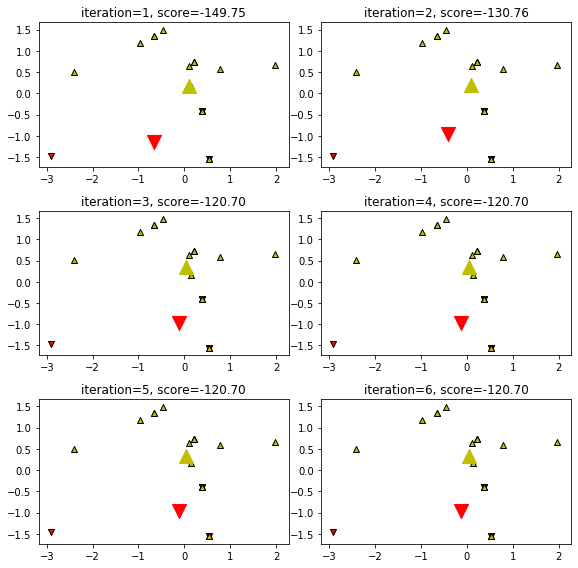

In [31]:
from sklearn.cluster import KMeans

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=8).fit(data_std_scaled)
    c0, c1 = model.cluster_centers_
    plt.scatter(data_std_scaled[model.labels_ == 0, 0], data_std_scaled[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(data_std_scaled[model.labels_ == 1, 0], data_std_scaled[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("iteration={}, score={:5.2f}".format(n, model.score(data_std_scaled)))
    
plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.subplot(325)
plot_KMeans(5)
plt.subplot(326)
plot_KMeans(6)
plt.tight_layout()
plt.show()

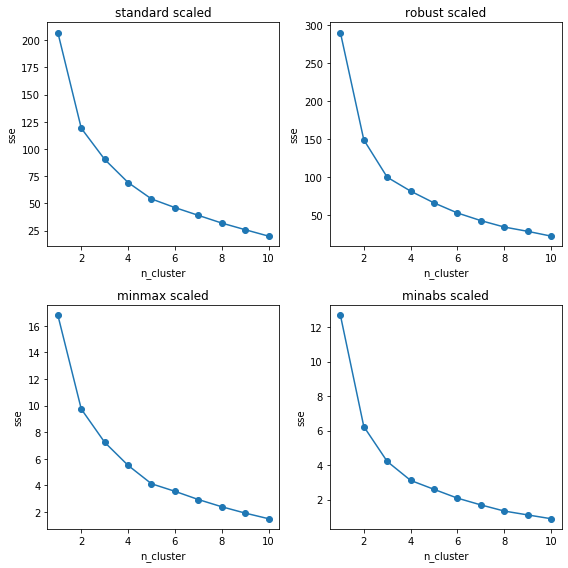

In [12]:
# 엘보우 기법
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))

sse = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(data_std_scaled)
    sse.append(km.inertia_)

plt.subplot(221)
plt.plot(range(1,11), sse, marker='o')
plt.title("standard scaled")
plt.xlabel("n_cluster")
plt.ylabel('sse')

sse = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(data_rbt_scaled)
    sse.append(km.inertia_)

plt.subplot(222)
plt.plot(range(1,11), sse, marker='o')
plt.title("robust scaled")
plt.xlabel("n_cluster")
plt.ylabel('sse')

sse = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(data_mm_scaled)
    sse.append(km.inertia_)

plt.subplot(223)
plt.plot(range(1,11), sse, marker='o')
plt.title("minmax scaled")
plt.xlabel("n_cluster")
plt.ylabel('sse')

sse = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(data_ma_scaled)
    sse.append(km.inertia_)

plt.subplot(224)
plt.plot(range(1,11), sse, marker='o')
plt.title("minabs scaled")
plt.xlabel("n_cluster")
plt.ylabel('sse')

plt.tight_layout()
plt.show()



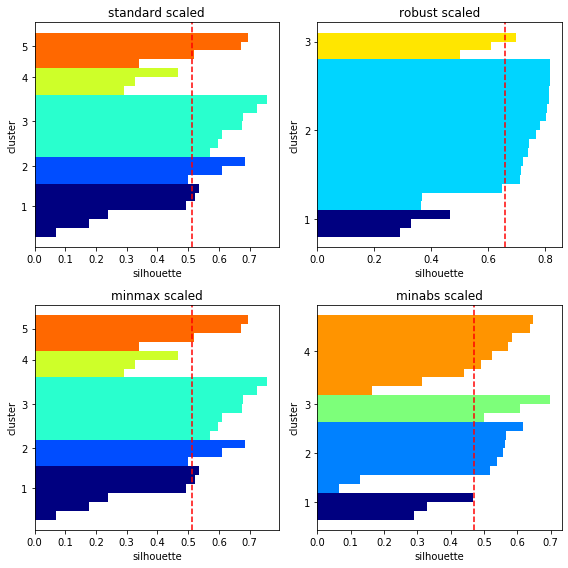

In [13]:
# 실루엣 기법
from sklearn.metrics import silhouette_samples
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))

# 데이터 X와 X를 임의의 클러스터 개수로 계산한 kmeans 결과인 y를 인자로 받아
# 각 클러스터에 속하는 개별 데이터의 실루엣 계수값을 수평 막대그래프로 그려주는 함수.
def plotSilhouette(X, y):
    cluster_labels = np.unique(y) # y의 고유값을 멤버로하는 배열
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y, metric='euclidean') #실루엣 계수 계산 결과 받
    y_ax_lower, y_ax_upper = 0,0
    yticks = []
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)


X = data201810.loc[:,"풍량":"버스이용자수"]
y = std_km5.fit_predict(X)
plt.subplot(221)
plotSilhouette(X,y)
plt.title("standard scaled")
plt.ylabel('cluster')
plt.xlabel('silhouette')

y = rbt_km5.fit_predict(X)
plt.subplot(222)
plotSilhouette(X,y)
plt.title("robust scaled")
plt.ylabel('cluster')
plt.xlabel('silhouette')

y = mm_km5.fit_predict(X)
plt.subplot(223)
plotSilhouette(X,y)
plt.title("minmax scaled")
plt.ylabel('cluster')
plt.xlabel('silhouette')
           
y = ma_km5.fit_predict(X)
plt.subplot(224)
plotSilhouette(X,y)
plt.title("minabs scaled")
plt.ylabel('cluster')
plt.xlabel('silhouette')

plt.tight_layout()
plt.show()

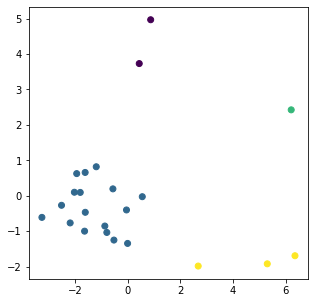

,지역,군집
0,강정동,0
1,건입동,2
2,구좌읍,4
3,남원읍,2
4,대정읍,4
5,중문동,2
6,서귀동,0
7,성산읍,4
8,아라동,3
9,외도일동,2


In [6]:
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

#Scaling
robust_scaler = RobustScaler()
data_rbt_scaled = robust_scaler.fit_transform(data201810.loc[:,"풍량":"숙박업수"])

# K-means
rbt_km5 = cluster.KMeans(n_clusters=4, random_state=42).fit(data_rbt_scaled)

# PCA for visualization
pca = PCA(n_components=2)
pca.fit(data_rbt_scaled)
pca_rbt = pca.transform(data_rbt_scaled)

plt.figure(figsize=(5,5))
plt.scatter(pca_rbt[:,0], pca_rbt[:,1], c=rbt_km5.labels_)
plt.show()

data201810["군집"] = std_km5.labels_
data201810[["지역","군집"]]



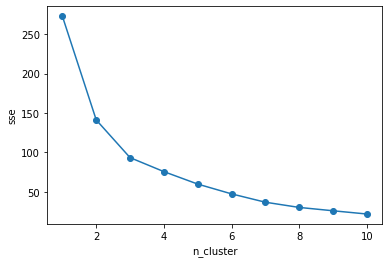

In [13]:
# 엘보우 기법
sse = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(data_rbt_scaled)
    sse.append(km.inertia_)
    
plt.plot(range(1,11), sse, marker='o')
plt.xlabel("n_cluster")
plt.ylabel('sse')
plt.show()

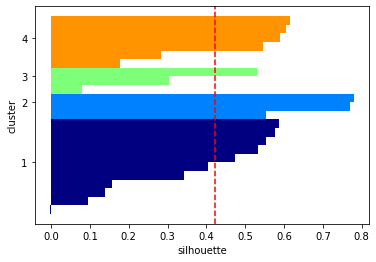

In [14]:
# 실루엣 기법
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# 데이터 X와 X를 임의의 클러스터 개수로 계산한 kmeans 결과인 y를 인자로 받아
# 각 클러스터에 속하는 개별 데이터의 실루엣 계수값을 수평 막대그래프로 그려주는 함수.
def plotSilhouette(X, y):
    cluster_labels = np.unique(y) # y의 고유값을 멤버로하는 배열
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y, metric='euclidean') #실루엣 계수 계산 결과 받
    y_ax_lower, y_ax_upper = 0,0
    yticks = []
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('cluster')
    plt.xlabel('silhouette')
    plt.show()


X = data201810.loc[:,"풍량":"숙박업수"]
y = rbt_km5.fit_predict(X)
plotSilhouette(X,y)

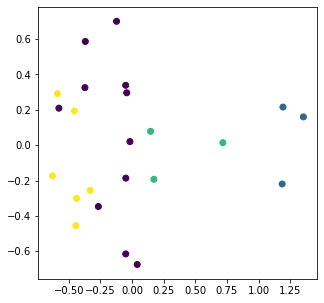

,지역,군집
0,강정동,3
1,건입동,2
2,구좌읍,1
3,남원읍,2
4,대정읍,1
5,중문동,2
6,서귀동,3
7,성산읍,1
8,아라동,0
9,외도일동,2


In [15]:
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

minmax_scaler = MinMaxScaler()
data_mm_scaled = minmax_scaler.fit_transform(data201810.loc[:,"풍량":"숙박업수"])

# K-means
mm_km5 = cluster.KMeans(n_clusters=4, random_state=42).fit(data_mm_scaled)

# PCA for visualization
pca = PCA(n_components=2)

pca.fit(data_mm_scaled)
pca_mm = pca.transform(data_mm_scaled)

plt.figure(figsize=(5,5))
plt.scatter(pca_mm[:,0], pca_mm[:,1], c=std_km5.labels_)
plt.show()

data201810["군집"] = mm_km5.labels_
data201810[["지역","군집"]]

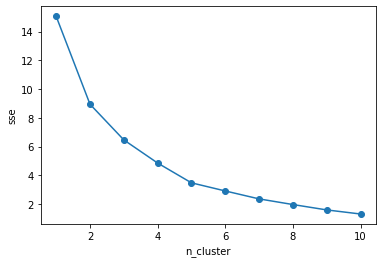

In [16]:
# 엘보우 기법
sse = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(data_mm_scaled)
    sse.append(km.inertia_)
    
plt.plot(range(1,11), sse, marker='o')
plt.xlabel("n_cluster")
plt.ylabel('sse')
plt.show()

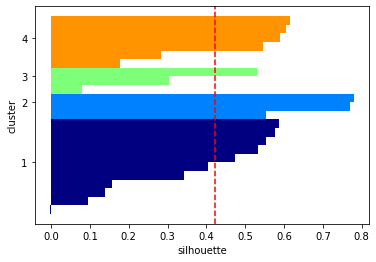

In [17]:
# 실루엣 기법
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# 데이터 X와 X를 임의의 클러스터 개수로 계산한 kmeans 결과인 y를 인자로 받아
# 각 클러스터에 속하는 개별 데이터의 실루엣 계수값을 수평 막대그래프로 그려주는 함수.
def plotSilhouette(X, y):
    cluster_labels = np.unique(y) # y의 고유값을 멤버로하는 배열
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y, metric='euclidean') #실루엣 계수 계산 결과 받
    y_ax_lower, y_ax_upper = 0,0
    yticks = []
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('cluster')
    plt.xlabel('silhouette')
    plt.show()


X = data201810.loc[:,"풍량":"숙박업수"]
y = mm_km5.fit_predict(X)
plotSilhouette(X,y)

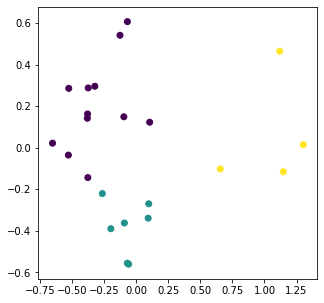

,지역,풍량,온도,거주인구,근무인구,방문인구,사업체수,학교수,숙박업수,군집
0,강정동,169.032258,18.069355,15783.340502,1635.290323,11029.750896,1758,1,102,0
1,건입동,135.009677,24.361290,8160.263441,1124.535842,8249.243728,767,2,29,0
2,구좌읍,195.067742,23.727419,14544.652330,1900.743728,9967.750896,1561,12,10,1
3,남원읍,147.774194,23.904167,14563.354839,1162.908602,9443.813620,1070,9,6,1
4,대정읍,199.858065,23.745161,20171.675627,1267.440860,8018.363799,1655,12,14,1
5,중문동,166.016129,23.386667,9636.908602,962.960573,6745.516129,721,5,4,0
6,서귀동,192.545161,20.775806,7478.523297,1621.340502,15784.365591,1758,3,147,0
7,성산읍,192.545161,20.775806,15177.551971,1261.939068,11603.808244,1484,10,26,1
8,아라동,192.545161,20.775806,47233.016129,8650.982079,17883.464158,1909,5,0,2
9,외도일동,135.009677,24.361290,12760.275986,767.817204,6144.840502,1329,0,27,0


In [111]:
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np

#Scaling
maxabs_scaler = MaxAbsScaler()
data_ma_scaled = maxabs_scaler.fit_transform(data201810.loc[:,"거주인구":"숙박업수"])

# K-means
ma_km5 = cluster.KMeans(n_clusters=3, random_state=42).fit(data_ma_scaled)

# PCA for visualization
pca = PCA(n_components=2)
pca.fit(data_ma_scaled)
pca_ma = pca.transform(data_ma_scaled)

plt.figure(figsize=(5,5))
plt.scatter(pca_ma[:,0], pca_ma[:,1], c=ma_km5.labels_)
plt.show()

data201810["군집"] = ma_km5.labels_
data201810

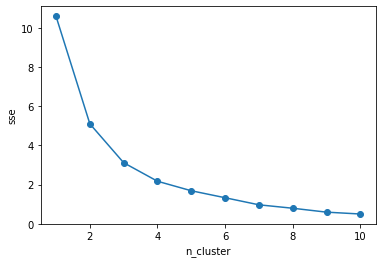

In [112]:
# 엘보우 기법
sse = []
for i in range(1,11):
    km = cluster.KMeans(n_clusters=i, init='k-means++', random_state=0)
    km.fit(data_ma_scaled)
    sse.append(km.inertia_)
    
plt.plot(range(1,11), sse, marker='o')
plt.xlabel("n_cluster")
plt.ylabel('sse')
plt.show()

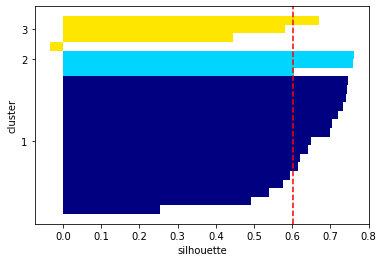

In [113]:
# 실루엣 기법
from sklearn.metrics import silhouette_samples
from matplotlib import cm

# 데이터 X와 X를 임의의 클러스터 개수로 계산한 kmeans 결과인 y를 인자로 받아
# 각 클러스터에 속하는 개별 데이터의 실루엣 계수값을 수평 막대그래프로 그려주는 함수.
def plotSilhouette(X, y):
    cluster_labels = np.unique(y) # y의 고유값을 멤버로하는 배열
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y, metric='euclidean') #실루엣 계수 계산 결과 받
    y_ax_lower, y_ax_upper = 0,0
    yticks = []
    
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
        
    silhoutte_avg = np.mean(silhouette_vals)
    plt.axvline(silhoutte_avg, color='red', linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('cluster')
    plt.xlabel('silhouette')
    plt.show()


X = data201902.loc[:,"거주인구":"숙박업수"]
y = ma_km5.fit_predict(X)
plotSilhouette(X,y)

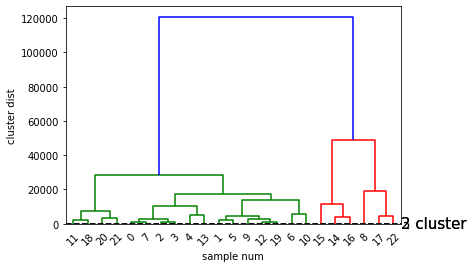

In [39]:
# 덴드로그램

from scipy.cluster.hierarchy import dendrogram, ward

# 데이터 배열 X에 ward함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환한다.
linkage_array = ward(data201810.loc[:,"풍량":"숙박업수"])

# 클러스터 간의거리 정보가 담긴 linkage_array를 사용해 덴드로 그램을 그린다.
dendrogram(linkage_array)

# 두개와 세개의 클러스터를 구분하느 커트라인
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, '2 cluster', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, '3 cluster', va='center', fontdict={'size':15})

plt.xlabel("sample num")
plt.ylabel("cluster dist")
plt.show()

In [ ]:
# 병합군집 agglomerative clustering

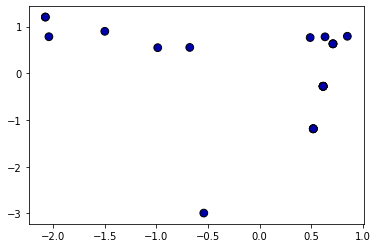

In [44]:
# DBSCAN
from sklearn.cluster import DBSCAN
import mglearn

X = data201810.loc[:,"풍량":"숙박업수"]

std_scaler = StandardScaler()
std_scaler.fit(X)

X_scaled = std_scaler.transform(X)

dbscan = DBSCAN(min_samples=4)
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:,0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.show()

In [41]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X = data201810.loc[:,"풍량":"숙박업수"] 
estimator = SVR(kernel = "linear")

selector = RFE(estimator, 7, step=1)
selector = selector.fit(X, data201810.loc[:,"매출"])
selector.support_

array([ True,  True, False,  True,  True,  True,  True,  True])

In [42]:
selector.ranking_

array([1, 1, 2, 1, 1, 1, 1, 1])

In [75]:
import seaborn as sns

corr = X.corr(method='pearson')
corr

# df_heatmap = sns.heatmap(corr, cbar = True, annot = True,
#                           annot_kw={'size':20}, fmt='.2f', square=True, cmap='Blues')

,풍량,온도,거주인구,근무인구,방문인구,사업체수,학교수,숙박업수,버스이용자수
풍량,1.000000,-0.341255,0.244020,0.290654,0.249873,0.245693,0.019996,0.050764,0.317112
온도,-0.341255,1.000000,-0.215500,-0.242175,-0.259200,-0.221919,0.150936,-0.440892,-0.273731
거주인구,0.244020,-0.215500,1.000000,0.935041,0.902917,0.907141,0.266188,0.053574,0.707019
근무인구,0.290654,-0.242175,0.935041,1.000000,0.914728,0.833971,0.157359,0.055679,0.805340
방문인구,0.249873,-0.259200,0.902917,0.914728,1.000000,0.929780,0.197353,0.320069,0.803400
사업체수,0.245693,-0.221919,0.907141,0.833971,0.929780,1.000000,0.206471,0.332478,0.663594
학교수,0.019996,0.150936,0.266188,0.157359,0.197353,0.206471,1.000000,-0.244207,-0.044997
숙박업수,0.050764,-0.440892,0.053574,0.055679,0.320069,0.332478,-0.244207,1.000000,0.261721
버스이용자수,0.317112,-0.273731,0.707019,0.805340,0.803400,0.663594,-0.044997,0.261721,1.000000
